# Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data Collection and Processing

In [4]:
df=pd.read_csv("gold.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
#number of rows and columns
df.shape

(2290, 6)

In [6]:
#getting some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Statistical measures
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

In [9]:
Correlation=df.corr()

<AxesSubplot:>

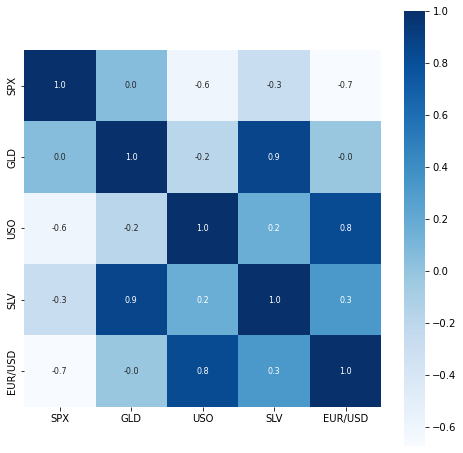

In [10]:
#Constructing heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(Correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
#Correlation value of GLD
print(Correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\kakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

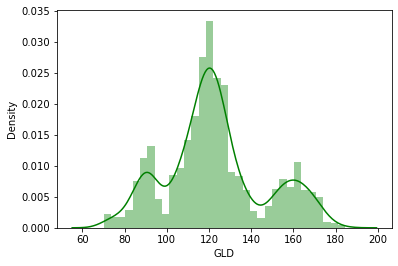

In [12]:
#Checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

# Splitting the data into features and labels

In [13]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [15]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Splitting the training and test data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Model Training

# Random Forest Regressor

In [19]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [20]:
#prediction on test data
test_data_prediction=rf.predict(x_test)

In [21]:
test_data_prediction

array([168.54439945,  82.14889981, 115.64999986, 127.64780086,
       120.59950142, 154.78569745, 150.50869837, 126.10810057,
       117.50139862, 125.94540099, 116.78700099, 171.38890092,
       141.24599801, 168.02489835, 115.12020011, 117.73730049,
       138.58740371, 169.85360005, 159.0471032 , 158.11559984,
       155.09179967, 125.46530054, 176.57839911, 157.12380434,
       125.29460041,  93.88069978,  78.12609999, 120.31519999,
       119.13649936, 167.36439914,  88.05620043, 125.3381999 ,
        91.13680108, 117.68130022, 121.13019924, 136.21890082,
       115.39890143, 115.1718007 , 147.87439942, 107.01270069,
       104.44420249,  87.49109829, 126.56300053, 117.95009958,
       154.603799  , 119.52110002, 108.31069975, 107.97069812,
        93.2295003 , 127.03959806,  75.06240026, 113.64299879,
       121.39870012, 111.18749924, 118.83809878, 120.03729933,
       159.94080011, 166.86940169, 146.80199644,  86.00889879,
        94.31980047,  86.87569907,  90.47000004, 119.00

In [22]:
#R Squared Error
error_square=metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error:",error_square)

R Squared Error: 0.9893355076833551


# Compare the actual values and predicted values in plot

In [23]:
y_test=list(y_test)

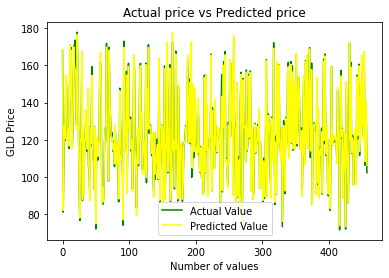

In [27]:
plt.plot(y_test,color='green',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()